# Exp3: Compress Deep Neural Network With Pruning

## Import Packages

In [2]:
from torch.utils.data import DataLoader
import torch
import torchvision.datasets as dset
import torchvision.transforms as T
import matplotlib.pyplot as plt

from tools.visualization import plot_features
from modules.vgg import vgg13_bn
from modules.mymodel import ResNet9
from tools.prune import mean_feature_maps, prune

%load_ext autoreload
%autoreload 2 

## Load CIFAR-10 Test Dataset

In [3]:
transform_test = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

# load test dataset
dset_test = dset.CIFAR10('./datasets', train=False, download=True, transform=transform_test)
loader_test = DataLoader(dset_test, batch_size=128, num_workers=2)

Files already downloaded and verified


# ResNet9
Load the resnet9 trained in exp_2 and plot mean feature maps of the last conv layer on test dataset.

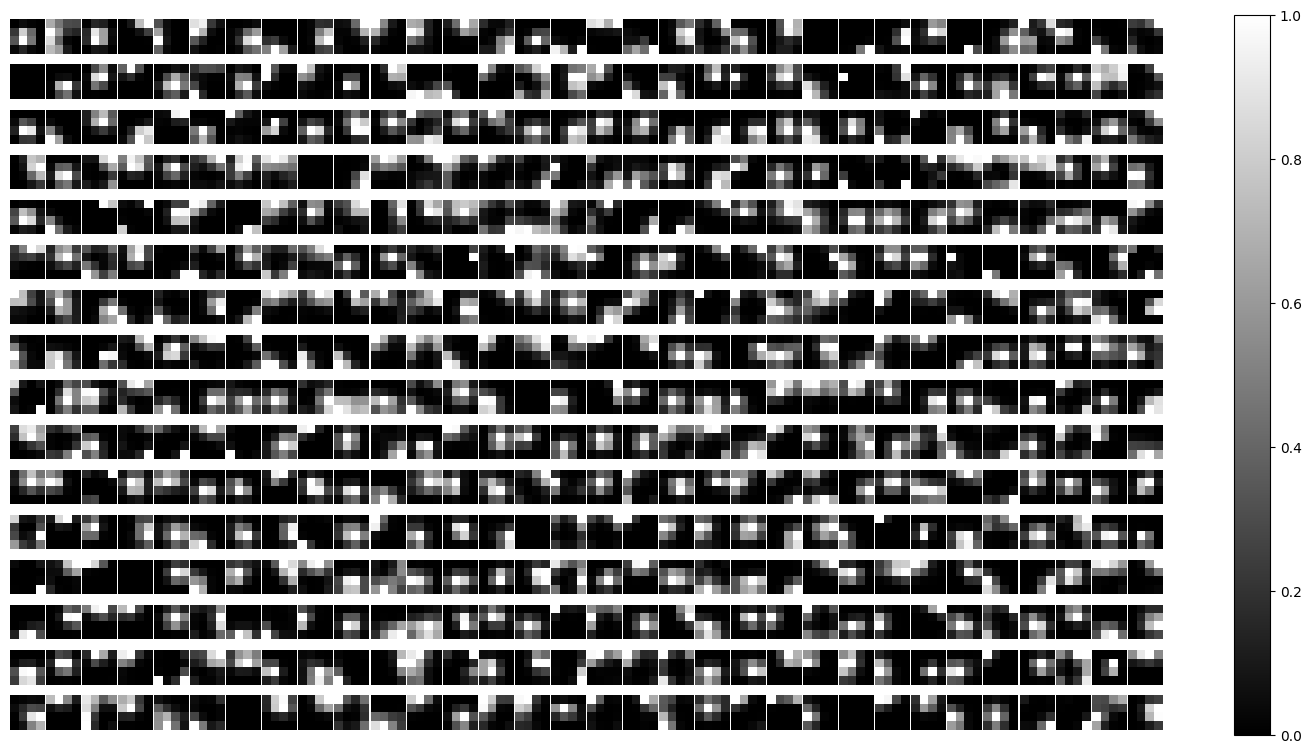

In [17]:
# load the model trained in exp_2
resnet9 = ResNet9()
resnet9.load_state_dict(torch.load('./work_dir/resnet/resnet9/epoch8.pth'))

# calculate the mean feature maps on test dataset
resnet9_fm = mean_feature_maps(loader_test, resnet9)

plot_features(resnet9_fm)

Start Pruning and record the change of accuracy.

In [11]:
# prune
neuron_nums, resnet9_acc_history = prune(resnet9, resnet9_fm, loader_test)

0 neurons: 90.56%
32 neurons: 90.50%
64 neurons: 90.53%
96 neurons: 90.28%
128 neurons: 90.13%
160 neurons: 90.04%
192 neurons: 90.13%
224 neurons: 89.98%
256 neurons: 89.66%
288 neurons: 89.50%
320 neurons: 89.40%
352 neurons: 89.14%
384 neurons: 88.90%
416 neurons: 88.29%
448 neurons: 87.63%
480 neurons: 87.41%
512 neurons: 86.52%


Visualize.

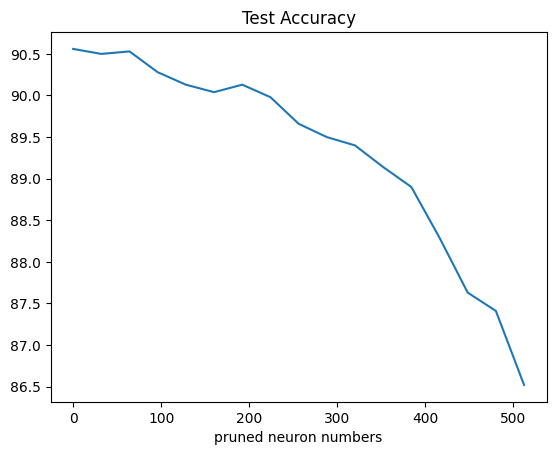

In [12]:
plt.title('Test Accuracy')
plt.xlabel('pruned neuron numbers')
plt.plot(neuron_nums, resnet9_acc_history, '-')
plt.show()

# VGG
Load the vgg13_bn trained in exp_2 and plot mean feature maps of the last conv layer on test dataset.

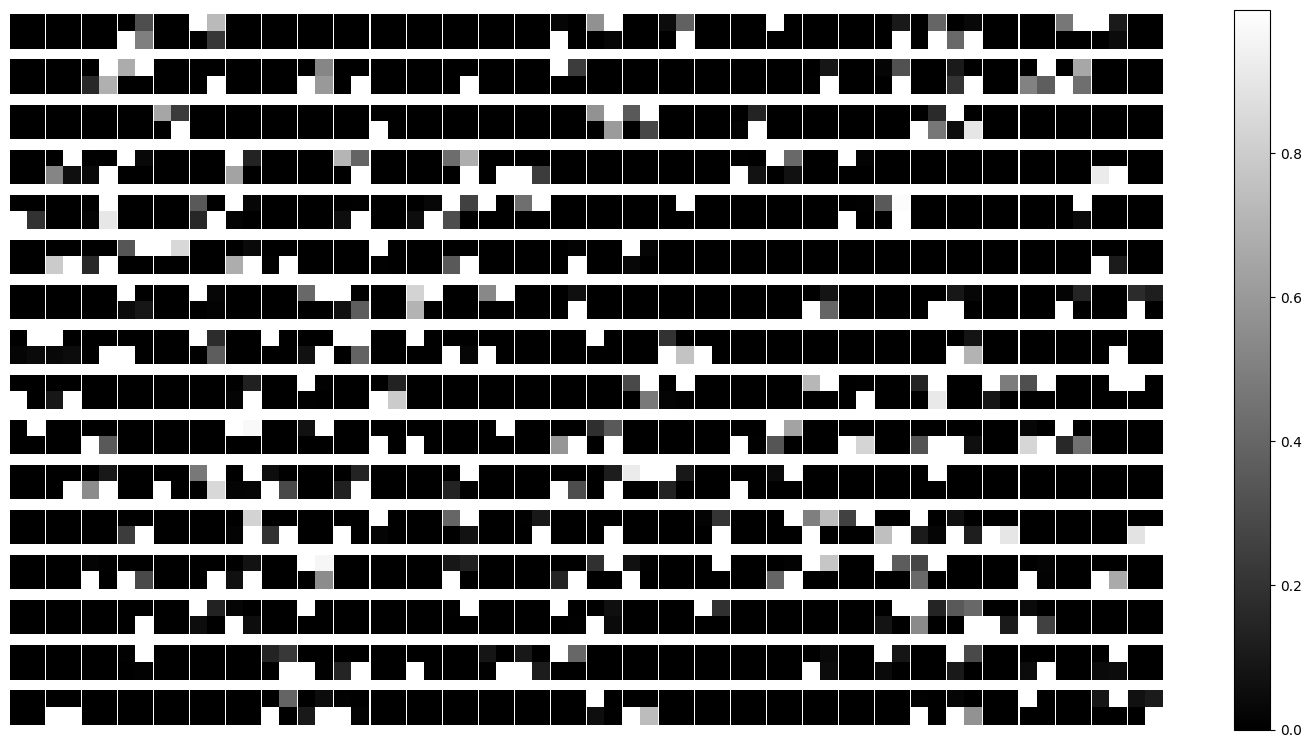

In [16]:
vgg13_bn_ = vgg13_bn(num_classes=10)
vgg13_bn_.load_state_dict(torch.load('./work_dir/vgg/vgg13_bn/epoch29.pth'))

# calculate the mean feature maps on test dataset
vgg13_bn_fm = mean_feature_maps(loader_test, vgg13_bn_)

plot_features(vgg13_bn_fm)

Start Pruning and record the change of accuracy.

In [19]:
# prune
neuron_nums, vgg13_bn_acc_history = prune(vgg13_bn_, vgg13_bn_fm, loader_test)

0 neurons: 92.18%
32 neurons: 92.18%
64 neurons: 92.25%
96 neurons: 92.24%
128 neurons: 92.09%
160 neurons: 91.92%
192 neurons: 91.94%
224 neurons: 91.28%
256 neurons: 91.32%
288 neurons: 91.20%
320 neurons: 91.08%
352 neurons: 90.54%
384 neurons: 90.23%
416 neurons: 82.94%
448 neurons: 83.38%
480 neurons: 39.02%
512 neurons: 10.00%


Visualize.

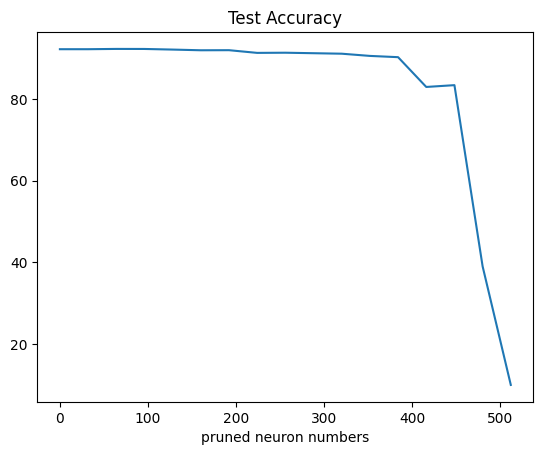

In [20]:
plt.title('Test Accuracy')
plt.xlabel('pruned neuron numbers')
plt.plot(neuron_nums, vgg13_bn_acc_history, '-')
plt.show()